## Final Project Submission

Please fill out:
* Student name: Jody Haring
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Matt Carr
* Blog post URL:


In [225]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns


In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
!ls zippedData

bom.movie_gross.csv.gz  im.db.zip               rt.reviews.tsv.gz
credits.csv             movies_metadata.csv     tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


## Budget

In [228]:
# Budget
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [229]:
budget_df.head(10)       ## Has production_budget as a string, movie titles could have issues
                         ## if trying to join with other df, no imbd id number. 5,782 entries with no 
                         ## null values.

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [230]:
budget_df['production_budget']

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

In [231]:
budget_df["worldwide_gross"]     ## HAS $0 FILL VALUES THAT DO NOT SHOW UP AS NULL ##

0       $2,776,345,279
1       $1,045,663,875
2         $149,762,350
3       $1,403,013,963
4       $1,316,721,747
             ...      
5777                $0
5778          $240,495
5779            $1,338
5780                $0
5781          $181,041
Name: worldwide_gross, Length: 5782, dtype: object

## Total World Gross

In [232]:
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [233]:
gross_df.info()        ### Only has 3,387 entries and only 2,037 for foreign gross ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Convert total_gross to a meaningful number

In [234]:
gross_df['foreign_gross'] = gross_df['foreign_gross'].str.replace(",","").astype(float)

In [235]:
gross_df['total_gross'] = gross_df['domestic_gross']+gross_df['foreign_gross']

In [236]:
# What happens if I convert total_gross to an int? 
gross_df['total_gross'] = gross_df['total_gross'].fillna(0).astype(int)
gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000
3,Inception,WB,292600000.0,535700000.0,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,698500000
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,623900000
7,Tangled,BV,200800000.0,391000000.0,2010,591800000
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,543100000
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,494900000


In [237]:
total_gross_df = gross_df.sort_values(by=['total_gross'], ascending=False)


In [238]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     3387 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 158.9+ KB


# SQL database 
 ### movie_basics table
  - has imdb movie_id
  - original_title
  - runtime_minutes
  - start_year
  - genres

In [239]:
conn = sqlite3.connect('zippedData/im.db')

In [240]:
cur = conn.cursor()

In [241]:
q = """
SELECT *
FROM movie_basics
INNER JOIN movie_akas
    USING(movie_id)
GROUP BY movie_id
;
"""
pd.read_sql(q,conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",1,One Day Before the Rainy Season,XWW,en,None,None,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,1,O Outro Lado do Vento,BR,None,imdbDisplay,None,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",1,Subse Bada Sukh,IN,bn,None,None,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1,La Telenovela Errante,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122297,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
122298,tt9913248,Nepal - Homebird,Nepal - Homebird,2019,52.0,Documentary,1,Nepal - Homebird,None,None,original,None,1.0
122299,tt9914254,A Cherry Tale,Kirsebæreventyret,2019,85.0,Documentary,1,Kirsebæreventyret,None,None,original,None,1.0
122300,tt9915436,Vida em Movimento,Vida em Movimento,2019,70.0,Documentary,1,Life in Movement,US,None,alternative,None,0.0


In [242]:
## This dataFrame is used in a join, DO NOT CHANGE ##
q = """
SELECT movie_id, primary_title, runtime_minutes, start_year, genres 
FROM movie_basics
WHERE start_year <= 2018
ORDER BY start_year
"""
imdb_df = pd.read_sql(q, conn)                      #### imdb dataFrame created from SQL df #####

In [243]:
null_values_length_q = """
SELECT primary_title, runtime_minutes
FROM movie_basics
WHERE runtime_minutes IS NULL
;
"""
pd.read_sql(null_values_length_q, conn)           

,primary_title,runtime_minutes
0,Sabse Bada Sukh,None
1,Bigfoot,None
2,O Silêncio,None
3,How Huang Fei-hong Rescued the Orphan from the...,None
4,Godfather,None
...,...,...
31734,Bobbyr Bondhura,None
31735,The Secret of China,None
31736,Rodolpho Teóphilo - O Legado de um Pioneiro,None
31737,Dankyavar Danka,None


In [244]:
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')

In [245]:
movie_info_df        ## Has rating and runtime, can also search genre for 'Kids and Family' ##   
                           ## Only has 1,560 movies  ##
                           ## No titles????? #### 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [246]:
movie_info_df.drop(columns=['synopsis','director','writer','dvd_date','studio'])

,id,rating,genre,theater_date,currency,box_office,runtime
0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971",NaN,NaN,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes
2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996",NaN,NaN,116 minutes
3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994",NaN,NaN,128 minutes
4,7,NR,Drama|Romance,NaN,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006",$,"33,886,034",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,"Jul 23, 1993",NaN,NaN,88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962",NaN,NaN,111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,"Apr 1, 1993",NaN,NaN,101 minutes


In [247]:
movie_info_df.groupby('rating').count()

,id,synopsis,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
rating,,,,,,,,,,,
G,57,56,57,51,38,48,48,9,9,57,13
NC17,1,1,1,1,1,1,1,1,1,1,1
NR,503,446,499,420,286,251,251,19,19,482,55
PG,240,240,240,209,185,204,204,52,52,239,77
PG-13,235,235,235,213,191,228,228,117,117,232,143
R,521,520,520,467,410,469,469,142,142,519,205


### New data from Kaggle, will need to get info for crediting if I use
 - movies_metadata.csv

In [248]:
metadata_df = pd.read_csv('zippedData/movies_metadata.csv')

/Users/jodyharing/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [249]:
metadata_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


### Try to create a df from this dataFrame for movies beteen 2010 and 2018 with no missing values for 
 - runtime
 - release_date (format to year only)
 - imbd_id
 ### Include
 - budget
 - adult or family
 - original title

In [250]:
# Replace null values in 'release_date' with 9999. This will make it so your apply function works.
metadata_df['release_date'] = metadata_df['release_date'].fillna('9999') 

In [251]:
# get movies from 2010 to 2018 first
# create column for release_date
metadata_df['year_release'] = metadata_df['release_date'].apply(lambda x: x[:4])

In [252]:
metadata_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year_release
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995


In [253]:
#### Get rid of all columns you are not going to use in your analysis ###############
new_metadata_df = metadata_df.drop(columns=['belongs_to_collection','homepage','id','original_language',
                          'overview','popularity','poster_path','production_companies','production_countries',
                         'spoken_languages','status','tagline','video','vote_average','vote_count'])

In [254]:
new_metadata_df.head()

,adult,budget,genres,imdb_id,original_title,release_date,revenue,runtime,title,year_release
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,Toy Story,1995-10-30,373554033.0,81.0,Toy Story,1995
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,Jumanji,1995-12-15,262797249.0,104.0,Jumanji,1995
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",tt0113228,Grumpier Old Men,1995-12-22,0.0,101.0,Grumpier Old Men,1995
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,Waiting to Exhale,1995-12-22,81452156.0,127.0,Waiting to Exhale,1995
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",tt0113041,Father of the Bride Part II,1995-02-10,76578911.0,106.0,Father of the Bride Part II,1995


# First Join 

In [255]:
final_df = budget_df.merge(new_metadata_df, left_on='movie', right_on='title', how='inner')

In [256]:
final_df = final_df.drop(columns = ['adult','genres','imdb_id','original_title','title'])

In [257]:
final_df.head()

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,budget,release_date_y,revenue,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",237000000,2009-12-10,2.787965e+09,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",380000000,2011-05-14,1.045714e+09,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",280000000,2015-04-22,1.405404e+09,141.0,2015
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",0,2017-11-15,0.000000e+00,0.0,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",245000000,2015-10-26,8.806746e+08,148.0,2015


In [258]:
#final_df.groupby('year_release').count().tail(50)
# let's drop movies before 2000
final_df = final_df[(final_df['year_release'].astype(int)) >= 2000]


In [259]:
# drop movies with 0.0 'runtime'
final_df = final_df[final_df['runtime']!= 0.0]

In [260]:
final_df.drop(['domestic_gross','budget','revenue'], axis = 1, inplace=True)

In [261]:
final_df

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279",2009-12-10,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",2011-05-14,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",2015-04-22,141.0,2015
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$879,620,923",2015-10-26,148.0,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$1,084,439,099",2012-07-16,165.0,2012
...,...,...,...,...,...,...,...,...
5827,60,"Jun 2, 2006",The Puffy Chair,"$15,000","$195,254",2005-01-17,85.0,2005
5828,61,"Apr 2, 2010",Breaking Upwards,"$15,000","$115,592",2009-03-14,88.0,2009
5830,67,"Apr 28, 2006",Clean,"$10,000","$138,711",2004-09-01,111.0,2004
5833,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584",2011-12-26,85.0,2011


## Not using below data anymore

In [262]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000
3,Inception,WB,292600000.0,535700000.0,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000


In [263]:
imdb_df.head()

,movie_id,primary_title,runtime_minutes,start_year,genres
0,tt0146592,Pál Adrienn,136.0,2010,Drama
1,tt0154039,So Much for Justice!,100.0,2010,History
2,tt0162942,Children of the Green Dragon,89.0,2010,Drama
3,tt0230212,The Final Journey,120.0,2010,Drama
4,tt0312305,Quantum Quest: A Cassini Space Odyssey,45.0,2010,"Adventure,Animation,Sci-Fi"


In [264]:
studio_df = imdb_df.merge(gross_df, left_on='primary_title', right_on='title', how='inner')

In [265]:
studio_df.head()

,movie_id,primary_title,runtime_minutes,start_year,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0398286,Tangled,100.0,2010,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,591800000
1,tt0402887,Capture the Flag,NaN,2010,Drama,Capture the Flag,Par.,6700.0,24600000.0,2015,24606700
2,tt3896100,Capture the Flag,94.0,2015,"Adventure,Animation,Comedy",Capture the Flag,Par.,6700.0,24600000.0,2015,24606700
3,tt0419692,Disconnect,112.0,2010,"Drama,Mystery,Sci-Fi",Disconnect,LD,1400000.0,NaN,2013,0
4,tt1433811,Disconnect,115.0,2012,"Drama,Thriller",Disconnect,LD,1400000.0,NaN,2013,0


In [266]:
studio_df[studio_df.duplicated(subset=['title','domestic_gross','total_gross'])]

,movie_id,primary_title,runtime_minutes,start_year,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
2,tt3896100,Capture the Flag,94.0,2015,"Adventure,Animation,Comedy",Capture the Flag,Par.,6700.0,24600000.0,2015,24606700
4,tt1433811,Disconnect,115.0,2012,"Drama,Thriller",Disconnect,LD,1400000.0,NaN,2013,0
5,tt8413566,Disconnect,107.0,2018,"Comedy,Romance",Disconnect,LD,1400000.0,NaN,2013,0
14,tt3070502,Unstoppable,65.0,2013,Documentary,Unstoppable,Fox,81600000.0,86200000.0,2010,167800000
15,tt2951338,Unstoppable,53.0,2015,"Biography,Documentary,History",Unstoppable,Fox,81600000.0,86200000.0,2010,167800000
...,...,...,...,...,...,...,...,...,...,...,...
3078,tt8289324,A Gentleman,70.0,2018,Drama,A Gentleman,FIP,410000.0,2500000.0,2017,2910000
3146,tt6896536,Foxtrot,113.0,2017,Drama,Foxtrot,SPC,619000.0,NaN,2018,0
3156,tt1213641,First Man,141.0,2018,"Biography,Drama,History",First Man,Uni.,44900000.0,60800000.0,2018,105700000
3274,tt9042690,The Negotiation,89.0,2018,"Documentary,History,War",The Negotiation,CJ,111000.0,NaN,2018,0


## Take care of duplicates and store in new dataFrame: working_studio_df
- Join all data necessary for analysis to this table.  

In [267]:
working_studio_df = studio_df[~studio_df.duplicated(subset=['primary_title','domestic_gross','total_gross'])]

In [268]:
working_studio_df.isna().sum()

movie_id              0
primary_title         0
runtime_minutes      34
start_year            0
genres                6
title                 0
studio                3
domestic_gross       17
foreign_gross      1042
year                  0
total_gross           0
dtype: int64

# Make all necessary joins, then handle null values.

In [269]:
working_studio_df.head(2)

,movie_id,primary_title,runtime_minutes,start_year,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0398286,Tangled,100.0,2010,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,591800000
1,tt0402887,Capture the Flag,NaN,2010,Drama,Capture the Flag,Par.,6700.0,24600000.0,2015,24606700


In [270]:
## Join dataFrame with budget: new_metadata_df   new_metadata_df['imdb_id'] = working_studio_df['movie_id']

## Change 'movie_id' column name to 'imdb_id'
working_studio_df = working_studio_df.rename(columns={'movie_id':'imdb_id'})

In [271]:
working_studio_df.head(2)

,imdb_id,primary_title,runtime_minutes,start_year,genres,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0398286,Tangled,100.0,2010,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,591800000
1,tt0402887,Capture the Flag,NaN,2010,Drama,Capture the Flag,Par.,6700.0,24600000.0,2015,24606700


In [272]:
# check for null values in 'imdb_id' in both dataFrames

working_studio_df['imdb_id'].isna().sum()

0

In [273]:
new_metadata_df['imdb_id'].isna().sum()        # found my issue

17

In [274]:
#drop null values in 'imdb_id' in new_metadata_df
new_metadata_df['imdb_id'].dropna(inplace=True)  # Why doesn't this work? 

In [275]:
new_metadata_df['imdb_id'].isna().sum()    

17

In [276]:
# try again
new_metadata_df = new_metadata_df[new_metadata_df['imdb_id'].notna()]

In [277]:
new_metadata_df['imdb_id'].isna().sum() 

0

In [278]:
# Try join again
working_studio_df = working_studio_df.merge(new_metadata_df, on = 'imdb_id')

In [279]:
working_studio_df

,imdb_id,primary_title,runtime_minutes,start_year,genres_x,title_x,studio,domestic_gross,foreign_gross,year,total_gross,adult,budget,genres_y,original_title,release_date,revenue,runtime,title_y,year_release
0,tt0398286,Tangled,100.0,2010,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,591800000,False,260000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",Tangled,2010-11-24,5.917949e+08,100.0,Tangled,2010
1,tt0427152,Dinner for Schmucks,114.0,2010,Comedy,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,86800000,False,69000000,"[{'id': 35, 'name': 'Comedy'}]",Dinner for Schmucks,2010-07-30,8.638786e+07,114.0,Dinner for Schmucks,2010
2,tt0429493,The A-Team,117.0,2010,"Action,Adventure,Thriller",The A-Team,Fox,77200000.0,100000000.0,2010,177200000,False,110000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",The A-Team,2010-06-10,1.772388e+08,117.0,The A-Team,2010
3,tt0435761,Toy Story 3,103.0,2010,"Adventure,Animation,Comedy",Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,False,200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",Toy Story 3,2010-06-16,1.066970e+09,103.0,Toy Story 3,2010
4,tt0446029,Scott Pilgrim vs. the World,112.0,2010,"Action,Comedy,Fantasy",Scott Pilgrim vs. the World,Uni.,31500000.0,16100000.0,2010,47600000,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Scott Pilgrim vs. the World,2010-07-27,4.766456e+07,112.0,Scott Pilgrim vs. the World,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,tt6333056,City of Ghosts,92.0,2017,"Documentary,War",City of Ghosts,IFC,128000.0,100000.0,2017,228000,False,0,"[{'id': 99, 'name': 'Documentary'}]",City of Ghosts,2017-07-14,0.000000e+00,90.0,City of Ghosts,2017
2035,tt6367558,Double Lover,107.0,2017,"Drama,Romance,Thriller",Double Lover,Cohen,168000.0,NaN,2018,0,False,0,"[{'id': 53, 'name': 'Thriller'}]",L'Amant double,2017-05-26,0.000000e+00,110.0,The Double Lover,2017
2036,tt6399158,Fabricated City,126.0,2017,"Action,Crime",Fabricated City,CJ,105000.0,NaN,2017,0,False,0,"[{'id': 28, 'name': 'Action'}]",조작된 도시,2017-02-09,0.000000e+00,126.0,Fabricated City,2017
2037,tt6461514,Duckweed,102.0,2017,"Comedy,Drama,Fantasy",Duckweed,CL,472000.0,150600000.0,2017,151072000,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",乘风破浪,2017-01-28,0.000000e+00,102.0,Duckweed,2017


## Which has the most data for world revenue?
- working_studio_df['total_gross'] : 1235
- working_studio_df['revenue']     : 1383
- budget_df['worldwide_gross']     : 5415  (movies start at 1975, still need more cleaning)

In [280]:
working_studio_df['total_gross'].value_counts()

0            804
16900000       4
9100000        4
19600000       4
5500000        3
            ... 
21529900       1
176600000      1
25300000       1
1032000        1
28700000       1
Name: total_gross, Length: 1108, dtype: int64

In [281]:
working_studio_df['revenue'].value_counts()

0.0            656
1359497.0        2
100000000.0      2
10000000.0       2
115860.0         2
              ... 
3430018.0        1
17752940.0       1
8574339.0        1
27437881.0       1
143101.0         1
Name: revenue, Length: 1379, dtype: int64

In [282]:
budget_df['worldwide_gross'].value_counts()

$0              367
$8,000,000        9
$7,000,000        6
$2,000,000        6
$9,000,000        4
               ... 
$17,382,693       1
$173,156          1
$158,908,290      1
$15,318,257       1
$30,399,714       1
Name: worldwide_gross, Length: 5356, dtype: int64

In [283]:
budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## Join budget_df to working_studio_df

In [284]:
new_studio_df = working_studio_df.merge(budget_df, left_on="primary_title", right_on='movie', how='inner')

In [285]:
new_studio_df.head(2)

,imdb_id,primary_title,runtime_minutes,start_year,genres_x,title_x,studio,domestic_gross_x,foreign_gross,year,...,revenue,runtime,title_y,year_release,id,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0398286,Tangled,100.0,2010,"Adventure,Animation,Comedy",Tangled,BV,200800000.0,391000000.0,2010,...,591794936.0,100.0,Tangled,2010,15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240"
1,tt0427152,Dinner for Schmucks,114.0,2010,Comedy,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,...,86387857.0,114.0,Dinner for Schmucks,2010,51,"Jul 30, 2010",Dinner for Schmucks,"$69,000,000","$73,026,337","$86,796,502"


In [286]:
#new_studio_df.info()

### Drop extra columns

In [287]:
# Drop extra titles
new_studio_df.drop(['title_x','title_y','movie','original_title'], axis=1, inplace=True)

In [288]:
# Drop extra runtimes, studio, and genres
new_studio_df.drop(['studio','runtime_minutes','genres_x','genres_y'], axis=1, inplace=True)

In [289]:
# Drop year and extra revenue info
new_studio_df.drop(['year','start_year','domestic_gross_x','release_date_x','domestic_gross_y',
                    'id','foreign_gross','adult','budget'], axis=1, inplace=True)


In [290]:
new_studio_df

,imdb_id,primary_title,total_gross,revenue,runtime,year_release,release_date_y,production_budget,worldwide_gross
0,tt0398286,Tangled,591800000,5.917949e+08,100.0,2010,"Nov 24, 2010","$260,000,000","$586,477,240"
1,tt0427152,Dinner for Schmucks,86800000,8.638786e+07,114.0,2010,"Jul 30, 2010","$69,000,000","$86,796,502"
2,tt0429493,The A-Team,177200000,1.772388e+08,117.0,2010,"Jun 11, 2010","$110,000,000","$177,241,171"
3,tt0435761,Toy Story 3,1067000000,1.066970e+09,103.0,2010,"Jun 18, 2010","$200,000,000","$1,068,879,522"
4,tt0455407,The Crazies,54800000,5.495614e+07,101.0,2010,"Feb 26, 2010","$19,000,000","$56,445,534"
...,...,...,...,...,...,...,...,...,...
964,tt5462602,The Big Sick,56400000,5.262018e+07,120.0,2017,"Jun 23, 2017","$5,000,000","$53,972,860"
965,tt6003368,Diary of a Wimpy Kid: The Long Haul,40100000,4.012014e+07,91.0,2017,"May 19, 2017","$22,000,000","$35,609,577"
966,tt6265828,A Ghost Story,0,1.558426e+07,92.0,2017,"Jul 7, 2017","$100,000","$2,769,782"
967,tt6288250,Patti Cake$,1482000,0.000000e+00,108.0,2017,"Aug 18, 2017","$1,000,000","$1,471,090"


In [291]:
# Dropping 'total_gross' and 'revenue' because it has more zero values than 'worldwide_gross'
# Dropping 'imdb_id' because I am not planning to join anymore data
new_studio_df.drop(['total_gross','revenue','imdb_id'], axis=1, inplace=True)

In [292]:
new_studio_df.info()    ## Make year_release, production_budget, and worldwide_gross an int 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 968
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      969 non-null    object 
 1   runtime            969 non-null    float64
 2   year_release       969 non-null    object 
 3   release_date_y     969 non-null    object 
 4   production_budget  969 non-null    object 
 5   worldwide_gross    969 non-null    object 
dtypes: float64(1), object(5)
memory usage: 53.0+ KB


In [293]:
new_studio_df

,primary_title,runtime,year_release,release_date_y,production_budget,worldwide_gross
0,Tangled,100.0,2010,"Nov 24, 2010","$260,000,000","$586,477,240"
1,Dinner for Schmucks,114.0,2010,"Jul 30, 2010","$69,000,000","$86,796,502"
2,The A-Team,117.0,2010,"Jun 11, 2010","$110,000,000","$177,241,171"
3,Toy Story 3,103.0,2010,"Jun 18, 2010","$200,000,000","$1,068,879,522"
4,The Crazies,101.0,2010,"Feb 26, 2010","$19,000,000","$56,445,534"
...,...,...,...,...,...,...
964,The Big Sick,120.0,2017,"Jun 23, 2017","$5,000,000","$53,972,860"
965,Diary of a Wimpy Kid: The Long Haul,91.0,2017,"May 19, 2017","$22,000,000","$35,609,577"
966,A Ghost Story,92.0,2017,"Jul 7, 2017","$100,000","$2,769,782"
967,Patti Cake$,108.0,2017,"Aug 18, 2017","$1,000,000","$1,471,090"


In [294]:
# remove '$' and ',' from production_budget and worldwide_gross
new_studio_df['worldwide_gross'] = new_studio_df['worldwide_gross'].str.replace('$','')
new_studio_df['worldwide_gross'] = new_studio_df['worldwide_gross'].str.replace(',','')
new_studio_df['production_budget'] = new_studio_df['production_budget'].str.replace('$','')
new_studio_df['production_budget'] = new_studio_df['production_budget'].str.replace(',','')

In [295]:
new_studio_df

,primary_title,runtime,year_release,release_date_y,production_budget,worldwide_gross
0,Tangled,100.0,2010,"Nov 24, 2010",260000000,586477240
1,Dinner for Schmucks,114.0,2010,"Jul 30, 2010",69000000,86796502
2,The A-Team,117.0,2010,"Jun 11, 2010",110000000,177241171
3,Toy Story 3,103.0,2010,"Jun 18, 2010",200000000,1068879522
4,The Crazies,101.0,2010,"Feb 26, 2010",19000000,56445534
...,...,...,...,...,...,...
964,The Big Sick,120.0,2017,"Jun 23, 2017",5000000,53972860
965,Diary of a Wimpy Kid: The Long Haul,91.0,2017,"May 19, 2017",22000000,35609577
966,A Ghost Story,92.0,2017,"Jul 7, 2017",100000,2769782
967,Patti Cake$,108.0,2017,"Aug 18, 2017",1000000,1471090


In [296]:
new_studio_df['release_date_y']

0      Nov 24, 2010
1      Jul 30, 2010
2      Jun 11, 2010
3      Jun 18, 2010
4      Feb 26, 2010
           ...     
964    Jun 23, 2017
965    May 19, 2017
966     Jul 7, 2017
967    Aug 18, 2017
968    Apr 25, 2003
Name: release_date_y, Length: 969, dtype: object

In [297]:
new_studio_df['release_date_y'] = new_studio_df['release_date_y'].str.lstrip(' ')

In [298]:
### Create a new column for 'month_release' 
new_studio_df['month_release'] = new_studio_df['release_date_y'].str.slice(stop=3)

In [299]:
#rename columns
new_studio_df.rename(columns={'primary_title':'movie_title','production_budget':'budget'}, inplace=True)                

In [300]:
new_studio_df.drop(['release_date_y'], axis=1, inplace=True)

In [301]:
# make budget and worldwide_gross int types
new_studio_df['budget'] = new_studio_df['budget'].astype(int)
new_studio_df['worldwide_gross'] = new_studio_df['worldwide_gross'].astype(int)

In [302]:
new_studio_df.groupby('year_release').mean()

,runtime,budget,worldwide_gross
year_release,,,
2010,105.461538,4.347973e+07,1.227412e+08
2011,106.351852,4.428074e+07,1.244014e+08
2012,108.429688,5.073531e+07,1.614522e+08
2013,111.456693,5.085827e+07,1.526789e+08
2014,110.386555,4.721975e+07,1.701311e+08
2015,110.769231,4.692479e+07,1.585083e+08
2016,109.033898,5.614831e+07,1.819986e+08
2017,102.047619,7.680952e+07,2.634375e+08


In [303]:
new_studio_df

,movie_title,runtime,year_release,budget,worldwide_gross,month_release
0,Tangled,100.0,2010,260000000,586477240,Nov
1,Dinner for Schmucks,114.0,2010,69000000,86796502,Jul
2,The A-Team,117.0,2010,110000000,177241171,Jun
3,Toy Story 3,103.0,2010,200000000,1068879522,Jun
4,The Crazies,101.0,2010,19000000,56445534,Feb
...,...,...,...,...,...,...
964,The Big Sick,120.0,2017,5000000,53972860,Jun
965,Diary of a Wimpy Kid: The Long Haul,91.0,2017,22000000,35609577,May
966,A Ghost Story,92.0,2017,100000,2769782,Jul
967,Patti Cake$,108.0,2017,1000000,1471090,Aug


## Make plots to compare budget, runtime, and month_release to worldwide_gross
 

In [304]:
final_df.head()

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279",2009-12-10,162.0,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",2011-05-14,136.0,2011
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",2015-04-22,141.0,2015
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$879,620,923",2015-10-26,148.0,2015
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$1,084,439,099",2012-07-16,165.0,2012


In [305]:
runtime_median = final_df['runtime'].median()
final_df['runtime_categories'] = final_df['runtime'].apply(
    lambda x: 'long' if x > runtime_median else 'short')
final_df.head()

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,runtime_categories
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279",2009-12-10,162.0,2009,long
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",2011-05-14,136.0,2011,long
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",2015-04-22,141.0,2015,long
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$879,620,923",2015-10-26,148.0,2015,long
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$1,084,439,099",2012-07-16,165.0,2012,long


In [306]:
runtime_median = new_studio_df['runtime'].median()
new_studio_df['runtime_categories'] = new_studio_df['runtime'].apply(
    lambda x: 'long' if x > runtime_median else 'short')
new_studio_df.head()

,movie_title,runtime,year_release,budget,worldwide_gross,month_release,runtime_categories
0,Tangled,100.0,2010,260000000,586477240,Nov,short
1,Dinner for Schmucks,114.0,2010,69000000,86796502,Jul,long
2,The A-Team,117.0,2010,110000000,177241171,Jun,long
3,Toy Story 3,103.0,2010,200000000,1068879522,Jun,short
4,The Crazies,101.0,2010,19000000,56445534,Feb,short


In [307]:
new_studio_df.groupby('runtime_categories').mean()

,runtime,budget,worldwide_gross
runtime_categories,,,
long,122.076605,6.180766e+07,1.925382e+08
short,94.650206,3.707240e+07,1.187080e+08


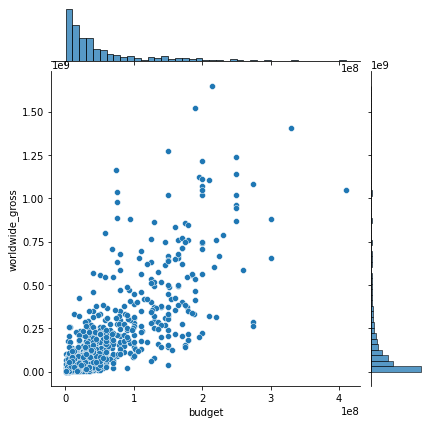

In [308]:
sns.jointplot(x='budget', y='worldwide_gross', data = new_studio_df)

In [309]:
final_df.head()

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,runtime_categories
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279",2009-12-10,162.0,2009,long
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",2011-05-14,136.0,2011,long
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",2015-04-22,141.0,2015,long
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$879,620,923",2015-10-26,148.0,2015,long
5,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$1,084,439,099",2012-07-16,165.0,2012,long


In [310]:
# remove '$' and ',' from production_budget and worldwide_gross
final_df['worldwide_gross'] = final_df['worldwide_gross'].str.replace('$','')
final_df['worldwide_gross'] = final_df['worldwide_gross'].str.replace(',','').astype(int)
final_df['production_budget'] = final_df['production_budget'].str.replace('$','')
final_df['production_budget'] = final_df['production_budget'].str.replace(',','').astype(int)

In [311]:
final_df.head()

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,runtime_categories
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,long
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011-05-14,136.0,2011,long
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,2015-04-22,141.0,2015,long
4,10,"Nov 6, 2015",Spectre,300000000,879620923,2015-10-26,148.0,2015,long
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000,1084439099,2012-07-16,165.0,2012,long


In [324]:
final_df['release_date'] = pd.to_datetime(final_df['release_date_y'])


,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,runtime_categories,release_date
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,long,2009-12-10
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011-05-14,136.0,2011,long,2011-05-14
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,2015-04-22,141.0,2015,long,2015-04-22
4,10,"Nov 6, 2015",Spectre,300000000,879620923,2015-10-26,148.0,2015,long,2015-10-26
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000,1084439099,2012-07-16,165.0,2012,long,2012-07-16


In [327]:
final_df['month_release'] = final_df['release_date'].dt.month

In [328]:
final_df.head()

,id,release_date_x,movie,production_budget,worldwide_gross,release_date_y,runtime,year_release,runtime_categories,release_date,month_release
0,1,"Dec 18, 2009",Avatar,425000000,2776345279,2009-12-10,162.0,2009,long,2009-12-10,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011-05-14,136.0,2011,long,2011-05-14,5
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,2015-04-22,141.0,2015,long,2015-04-22,4
4,10,"Nov 6, 2015",Spectre,300000000,879620923,2015-10-26,148.0,2015,long,2015-10-26,10
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000,1084439099,2012-07-16,165.0,2012,long,2012-07-16,7


In [329]:
final_df.dtypes

id                             int64
release_date_x                object
movie                         object
production_budget              int64
worldwide_gross                int64
release_date_y                object
runtime                      float64
year_release                  object
runtime_categories            object
release_date          datetime64[ns]
month_release                  int64
dtype: object

#### New plots with final_df

In [312]:
final_df['runtime'].median()

102.0

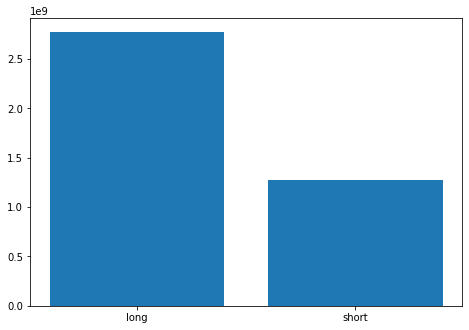

In [313]:
gross = final_df['worldwide_gross']
budget = final_df['production_budget']
length = final_df['runtime_categories']
runtime = final_df['runtime']
 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(length,gross)
plt.show()

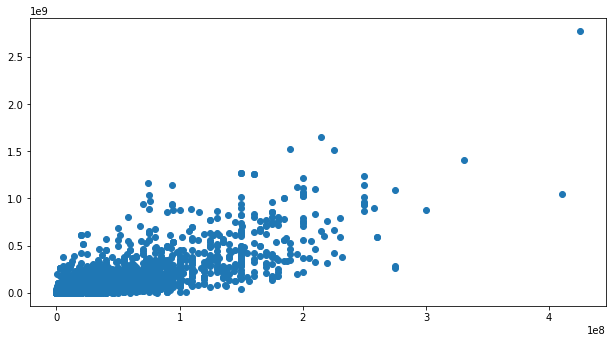

In [314]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.scatter(budget,gross)
plt.show()

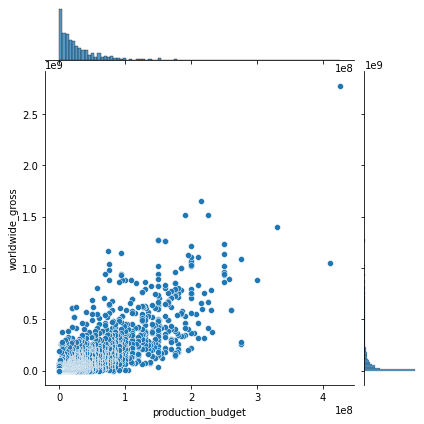

In [319]:
sns.jointplot(x='production_budget', y='worldwide_gross', data = final_df)

(array([2.809e+03, 6.050e+02, 1.880e+02, 1.320e+02, 5.900e+01, 1.800e+01,
        6.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([7.000000e+03, 4.250630e+07, 8.500560e+07, 1.275049e+08,
        1.700042e+08, 2.125035e+08, 2.550028e+08, 2.975021e+08,
        3.400014e+08, 3.825007e+08, 4.250000e+08]),
 <BarContainer object of 10 artists>)

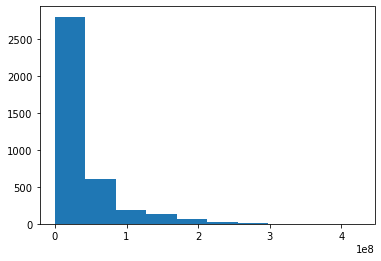

In [315]:
plt.hist(budget)

<AxesSubplot:>

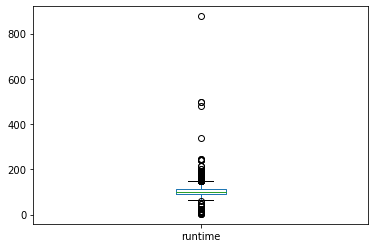

In [323]:
runtime.plot(kind='box')

In [317]:
final_df['runtime'].max()

877.0

In [332]:
ave_month_gross_df = final_df.groupby('month_release').mean().reset_index()

In [338]:
ave_month_gross_df.dtypes

month_release          int64
id                   float64
production_budget    float64
worldwide_gross      float64
runtime              float64
dtype: object

<AxesSubplot:xlabel='month_release', ylabel='worldwide_gross'>

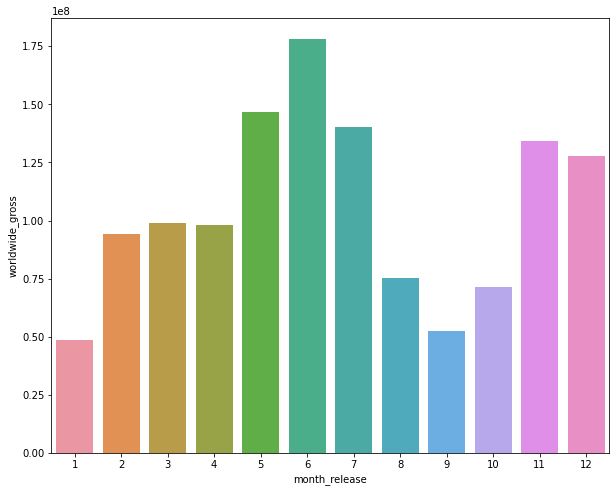

In [341]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data = ave_month_gross_df, x='month_release', y='worldwide_gross')